MovieWriter imagemagick unavailable; using Pillow instead.


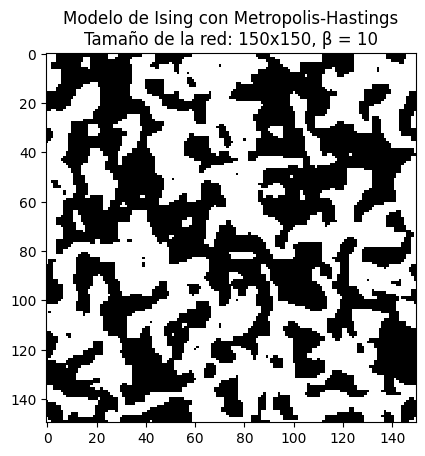

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 150
J = 0.2
beta = 10
frames = 500
iteraciones = 400


def inicializar_el_sistema(N):
    grilla = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            grilla[i,j] = np.random.choice([-1, 1])       
    return grilla 
grilla = inicializar_el_sistema(N)


def calcular_energia_en_un_punto(grilla, i, j, N):
    E = -J*(grilla[i, j]* grilla[(i + 1) % N, j] + grilla[i, j]* grilla[(i - 1) % N, j] + grilla[i, j]* grilla[i, (j + 1) % N] + grilla[i, j]* grilla[i, (j - 1) % N])
    return  E


def nueva_configuracion( N, beta):
    global grilla
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)

    perturbado = grilla.copy()
    if perturbado[i, j] == 1:
        perturbado[i, j] = -1
    else:
        perturbado[i, j] = 1

    E_old = calcular_energia_en_un_punto(grilla, i, j, N) +  calcular_energia_en_un_punto(grilla, (i-1)%N, j, N) +  calcular_energia_en_un_punto(grilla, (i+1)%N, j, N) +  calcular_energia_en_un_punto(grilla, i, (j-1)%N, N) +  calcular_energia_en_un_punto(grilla, i, (j+1)%N, N)
    E_new = calcular_energia_en_un_punto(perturbado, i, j, N) + calcular_energia_en_un_punto(perturbado, (i- 1)%N, j, N) + calcular_energia_en_un_punto(perturbado, (i+1)%N, j, N) + calcular_energia_en_un_punto(perturbado, i, (j-1)%N, N) + calcular_energia_en_un_punto(perturbado, i, (j+1)%N, N)

    delta_E = E_new - E_old

    if delta_E <= 0 or np.random.rand() <= np.exp(-delta_E * beta):
        grilla_final = perturbado.copy()
    else:
        grilla_final = grilla.copy()

    return grilla_final



def update(frames, im, N, beta, iteraciones):
    global grilla
    for i in range(iteraciones):
        grilla = nueva_configuracion( N, beta)
    im.set_array(grilla)
    return [im]

def animate_ising(N, beta, frames, iteraciones):
    grilla = inicializar_el_sistema(N)
    
    # Configurar la figura
    fig, ax = plt.subplots()
    im = ax.imshow(grilla, cmap='gray', interpolation='nearest')
    ax.set_title(f"Modelo de Ising con Metropolis-Hastings\nTamaño de la red: {N}x{N}, β = {beta}")
    
    # Crear la animación
    ani = animation.FuncAnimation(fig, update, frames=frames, fargs=(im, N, beta, iteraciones), interval=50)
    
    # Guardar el resultado en un archivo de video
    ani.save('ising_model_simulation.gif', writer='imagemagick', fps=10)
    
    plt.show()

# Ejecutar la animación
animate_ising(N, beta, frames, iteraciones)
